# Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading csv files using pandas

In [2]:
cab_data = pd.read_csv("/Users/samiatbola-matanmi/Documents/ML_Prac/Data/Datasets/Cab_data.csv")
city_data = pd.read_csv("/Users/samiatbola-matanmi/Documents/ML_Prac/Data/Datasets/City.csv")
customer_data = pd.read_csv("/Users/samiatbola-matanmi/Documents/ML_Prac/Data/Datasets/Customer_ID.csv")
transaction_data = pd.read_csv("/Users/samiatbola-matanmi/Documents/ML_Prac/Data/Datasets/Transaction_ID.csv")

# Cab_data.csv

In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [5]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [6]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


# City_data.csv

In [7]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


# Transaction_data.csv

In [8]:
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [9]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


# Customer_data.csv

In [10]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [161]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
# Check for city data not in cab data
np.setdiff1d(city_data.City, cab_data.City)

array(['SAN FRANCISCO CA'], dtype=object)

In [12]:
# Check fot transaction not in cab data
len(np.setdiff1d(transaction_data['Transaction ID'], ['cab_data.Transaction ID']))

/opt/homebrew/Caskroom/miniforge/base/envs/eda/lib/python3.8/site-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


440098

# Merging cab_data and transaction_data on Transaction ID column to produce dataFrame1

In [13]:
dataFrame1 = pd.merge(cab_data, transaction_data, on='Transaction ID')
dataFrame1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [14]:
dataFrame1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
 7   Customer ID     359392 non-null  int64  
 8   Payment_Mode    359392 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 27.4+ MB


In [15]:
len(np.setdiff1d(customer_data['Customer ID'], dataFrame1['Customer ID']))

3023

# Merging dataFrame1 and Customer_data on Customer ID

In [16]:
dataFrame2 = pd.merge(dataFrame1, customer_data , on='Customer ID')
dataFrame2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,21/07/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,23/11/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,21/04/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [17]:
dataFrame2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 35.6+ MB


In [18]:
US_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

City = []
State = []

for i in range(len(dataFrame2)):
    if dataFrame2.City[i].split()[~0] in US_states:
        City.append(dataFrame2.City[i].split(f'{dataFrame1.City[i].split()[~0]}')[0])
        State.append(dataFrame2.City[i].split()[~0])
    else:
        City.append(dataFrame2.City[i])
        State.append(np.nan)

In [19]:
dataFrame2['City'] = City
dataFrame2['State'] = State

dataFrame2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),State
0,10000011,08/01/2016,Pink Cab,ATLANTA,30.45,370.95,313.6350,29290,Card,Male,28,10813,GA
1,10351127,21/07/2018,Yellow Cab,ATLANTA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,GA
2,10412921,23/11/2018,Yellow Cab,ATLANTA,42.55,792.05,597.4020,29290,Card,Male,28,10813,GA
3,10000012,06/01/2016,Pink Cab,ATLANTA,28.62,358.52,334.8540,27703,Card,Male,27,9237,GA
4,10320494,21/04/2018,Yellow Cab,ATLANTA,36.38,721.10,467.1192,27703,Card,Male,27,9237,GA


In [20]:
print(dataFrame2.City.unique())
dataFrame2.State.unique()

['ATLANTA ' 'ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'CHICAGO '
 'CHI' 'DALLAS TX' 'DENVER CO' 'LOS ANGELES CA' 'LOS ANGELES ' 'MIAMI FL'
 'NASHVILLE TN' 'NEW YORK ' 'NEW YORK NY' 'ORANGE COUNTY' 'PHOENIX AZ'
 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SAN DIEGO ' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC' 'BOSTON ' 'DALLAS ' 'NASHV'
 '' 'WASHINGTON ' 'DENVER ' 'SACRAMENTO ' 'AUSTIN ' 'MIAMI ' 'SEATTLE '
 'TUCSON ' 'NASHVILLE ' 'PHOENIX ' 'PITTSBURGH ']


array(['GA', 'TX', 'MA', 'IL', 'CO', 'CA', 'FL', 'TN', 'NY', nan, 'AZ',
       'PA', 'WA', 'DC'], dtype=object)

In [21]:
dataFrame2.isnull().sum()

Transaction ID            0
Date of Travel            0
Company                   0
City                      0
KM Travelled              0
Price Charged             0
Cost of Trip              0
Customer ID               0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
State                 12501
dtype: int64

In [22]:
dataFrame2[dataFrame2.State.isna()]['City'].unique()

array(['ORANGE COUNTY', 'SILICON VALLEY'], dtype=object)

In [23]:
dataFrame2.fillna('CA', inplace=True)

In [24]:
dataFrame2.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
State                 0
dtype: int64

In [25]:
dataFrame2.duplicated().sum()

0

In [29]:
dataFrame2.columns = [col.strip().replace(' ', '_').lower() for col in dataFrame2.columns]
print(dataFrame2.columns)
dataFrame2.rename(columns = {'income_(usd/month)' : 'customer_income', 
                          'date_of_travel' : 'travel_date'}, inplace = True)
print(dataFrame2.columns)

Index(['transaction_id', 'date_of_travel', 'company', 'city', 'km_travelled',
       'price_charged', 'cost_of_trip', 'customer_id', 'payment_mode',
       'gender', 'age', 'customer_income', 'state'],
      dtype='object')
Index(['transaction_id', 'travel_date', 'company', 'city', 'km_travelled',
       'price_charged', 'cost_of_trip', 'customer_id', 'payment_mode',
       'gender', 'age', 'customer_income', 'state'],
      dtype='object')


In [31]:
dataFrame2.sort_values(['travel_date', 'transaction_id'], ignore_index=True, inplace = True)

In [32]:
dataFrame2

,transaction_id,travel_date,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,customer_income,state
0,10128150,01/01/2017,Pink Cab,ATLANTA GA,24.00,379.79,280.8000,28154,Card,Male,49,22791,GA
1,10128153,01/01/2017,Pink Cab,ATLANTA GA,38.88,609.62,443.2320,29383,Card,Female,57,3602,GA
2,10128188,01/01/2017,Pink Cab,BOSTON MA,41.44,630.76,464.1280,59347,Card,Male,26,9408,MA
3,10128190,01/01/2017,Pink Cab,BOSTON,31.36,463.01,373.1840,58311,Card,Female,19,24987,MA
4,10128192,01/01/2017,Pink Cab,BOSTON MA,40.46,597.36,457.1980,57940,Cash,Female,30,17411,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439960,31/12/2018,Yellow Cab,WASHINGTON DC,33.93,474.47,411.2316,52449,Card,Female,40,23569,DC
359388,10439984,31/12/2018,Yellow Cab,WASHINGTON DC,40.00,641.78,484.8000,51614,Card,Female,55,12279,DC
359389,10440028,31/12/2018,Yellow Cab,WASHINGTON DC,26.22,405.25,327.2256,52389,Card,Female,29,5568,DC
359390,10440034,31/12/2018,Yellow Cab,WASHINGTON DC,34.68,505.38,470.2608,51877,Cash,Male,46,16993,DC


In [33]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [34]:
city_data.Population[0], city_data.Users[0]

(' 8,405,837 ', ' 302,149 ')

In [35]:
city_data.Population = [city_data.Population[i].replace(",", "") for i in range(len(city_data.Population))]

In [36]:
city_data.Users = [city_data.Users[i].replace(",", "") for i in range(len(city_data.Users))]

In [37]:
city_data

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [38]:
city_data.Population = city_data.Population.astype('int64')
city_data.Users = city_data.Users.astype('int64')

In [39]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [40]:
US_States = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

state = []
city = []

for i in range(len(city_data)):
    if city_data.City[i].split()[~0] in US_States:
        city.append(city_data.City[i].split(f' {city_data.City[i].split()[~0]}')[0])
        state.append(city_data.City[i].split()[~0])
    else:
        city.append(city_data.City[i])
        state.append(np.nan)
        
city_data.City = city
city_data['state'] = state

In [41]:
city_data.rename(columns={'City': 'city'}, inplace=True)
city_data

,city,Population,Users,state
0,NEW YORK,8405837,302149,NY
1,CHICAGO,1955130,164468,IL
2,LOS ANGELES,1595037,144132,CA
3,MIAMI,1339155,17675,FL
4,SILICON VALLEY,1177609,27247,NaN
5,ORANGE COUNTY,1030185,12994,NaN
6,SAN DIEGO,959307,69995,CA
7,PHOENIX,943999,6133,AZ
8,DALLAS,942908,22157,TX
9,ATLANTA,814885,24701,GA


In [42]:
city_data.fillna('CA', inplace = True)

In [43]:
dataFrame2.head()

,transaction_id,travel_date,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,customer_income,state
0,10128150,01/01/2017,Pink Cab,ATLANTA GA,24.00,379.79,280.800,28154,Card,Male,49,22791,GA
1,10128153,01/01/2017,Pink Cab,ATLANTA GA,38.88,609.62,443.232,29383,Card,Female,57,3602,GA
2,10128188,01/01/2017,Pink Cab,BOSTON MA,41.44,630.76,464.128,59347,Card,Male,26,9408,MA
3,10128190,01/01/2017,Pink Cab,BOSTON,31.36,463.01,373.184,58311,Card,Female,19,24987,MA
4,10128192,01/01/2017,Pink Cab,BOSTON MA,40.46,597.36,457.198,57940,Cash,Female,30,17411,MA


In [44]:
dataFrame2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   transaction_id   359392 non-null  int64  
 1   travel_date      359392 non-null  object 
 2   company          359392 non-null  object 
 3   city             359392 non-null  object 
 4   km_travelled     359392 non-null  float64
 5   price_charged    359392 non-null  float64
 6   cost_of_trip     359392 non-null  float64
 7   customer_id      359392 non-null  int64  
 8   payment_mode     359392 non-null  object 
 9   gender           359392 non-null  object 
 10  age              359392 non-null  int64  
 11  customer_income  359392 non-null  int64  
 12  state            359392 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 35.6+ MB


# Yearly profit of each cab company

In [45]:
dataFrame2['travel_date'] = dataFrame2['travel_date'].astype('datetime64[ns]')

/opt/homebrew/Caskroom/miniforge/base/envs/eda/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '13/01/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/homebrew/Caskroom/miniforge/base/envs/eda/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '13/01/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/homebrew/Caskroom/miniforge/base/envs/eda/lib/python3.8/site-packages/pandas/core/tools/datetimes.py:1063: UserWarning: Parsing '13/01/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/opt/homebrew/Caskroom/miniforge/base/envs/eda/lib/python3.8/sit

In [46]:
dataFrame2['year'] = dataFrame2['travel_date'].dt.year
dataFrame2['month'] = dataFrame2.travel_date.dt.month
dataFrame2['dayofweek'] = dataFrame2.travel_date.dt.dayofweek
dataFrame2['day'] = dataFrame2.travel_date.dt.day

dataFrame2['year'] = sorted(dataFrame2['year'].astype('string'))

In [47]:
dataFrame2['profit'] = dataFrame2['price_charged'] - dataFrame2['cost_of_trip']
dataFrame2.head()

,transaction_id,travel_date,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,customer_income,state,year,month,dayofweek,day,profit
0,10128150,2017-01-01,Pink Cab,ATLANTA GA,24.00,379.79,280.800,28154,Card,Male,49,22791,GA,2016,1,6,1,98.990
1,10128153,2017-01-01,Pink Cab,ATLANTA GA,38.88,609.62,443.232,29383,Card,Female,57,3602,GA,2016,1,6,1,166.388
2,10128188,2017-01-01,Pink Cab,BOSTON MA,41.44,630.76,464.128,59347,Card,Male,26,9408,MA,2016,1,6,1,166.632
3,10128190,2017-01-01,Pink Cab,BOSTON,31.36,463.01,373.184,58311,Card,Female,19,24987,MA,2016,1,6,1,89.826
4,10128192,2017-01-01,Pink Cab,BOSTON MA,40.46,597.36,457.198,57940,Cash,Female,30,17411,MA,2016,1,6,1,140.162


In [71]:
percent_profit = dataFrame2.groupby(['year', 'company'])[['profit', 'cost_of_trip']].sum().reset_index()
percent_profit['%profit'] = (percent_profit['profit'] / percent_profit['cost_of_trip'])*100
percent_profit

,year,company,profit,cost_of_trip,%profit
0,2016,Pink Cab,1.619696e+06,6.282079e+06,25.782800
1,2016,Yellow Cab,1.331183e+07,2.434768e+07,54.673892
2,2017,Pink Cab,1.898976e+06,7.537153e+06,25.194876
3,2017,Yellow Cab,1.579888e+07,2.931620e+07,53.891293
4,2018,Pink Cab,1.788656e+06,7.201691e+06,24.836613
5,2018,Yellow Cab,1.490967e+07,2.816964e+07,52.928163


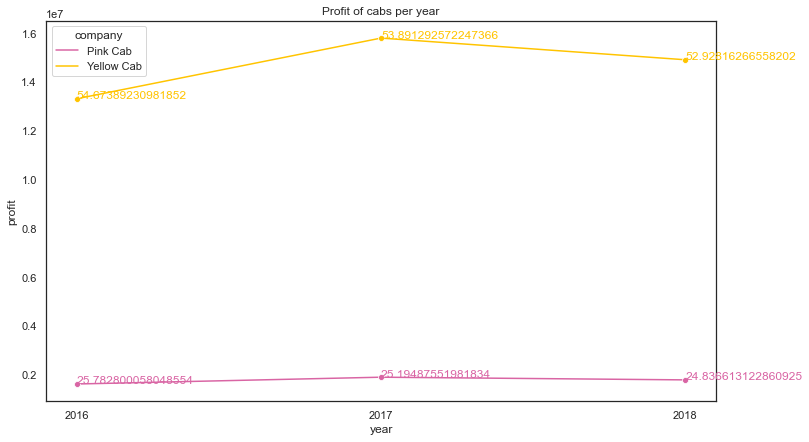

In [82]:
palette = ['#d965a4', '#ffc400']

sns.set()
plt.figure(figsize=(12, 7))
sns.set_style('white')
ax = sns.lineplot(x="year", y="profit", data=percent_profit, hue='company', marker='o', palette=palette)
ax.set(title="Profit of cabs per year")

for item, color in zip(percent_profit.groupby('company'),palette):
    for x,y,m in item[1][['year','profit','%profit']].values:
#         print(x,y,m)
        plt.text(x,y,m,color=color)

In [50]:
city_data

,city,Population,Users,state
0,NEW YORK,8405837,302149,NY
1,CHICAGO,1955130,164468,IL
2,LOS ANGELES,1595037,144132,CA
3,MIAMI,1339155,17675,FL
4,SILICON VALLEY,1177609,27247,CA
5,ORANGE COUNTY,1030185,12994,CA
6,SAN DIEGO,959307,69995,CA
7,PHOENIX,943999,6133,AZ
8,DALLAS,942908,22157,TX
9,ATLANTA,814885,24701,GA


In [51]:
city_data.groupby(['state', 'city']).mean()[['Population', 'Users']]

Population     Users
state city                                
AZ    PHOENIX           943999.0    6133.0
      TUCSON            631442.0    5712.0
CA    LOS ANGELES      1595037.0  144132.0
      ORANGE COUNTY    1030185.0   12994.0
      SACRAMENTO        545776.0    7044.0
      SAN DIEGO         959307.0   69995.0
      SAN FRANCISCO     629591.0  213609.0
      SILICON VALLEY   1177609.0   27247.0
CO    DENVER            754233.0   12421.0
DC    WASHINGTON        418859.0  127001.0
FL    MIAMI            1339155.0   17675.0
GA    ATLANTA           814885.0   24701.0
IL    CHICAGO          1955130.0  164468.0
MA    BOSTON            248968.0   80021.0
NY    NEW YORK         8405837.0  302149.0
PA    PITTSBURGH        542085.0    3643.0
TN    NASHVILLE         327225.0    9270.0
TX    AUSTIN            698371.0   14978.0
      DALLAS            942908.0   22157.0
WA    SEATTLE           671238.0   25063.0

In [52]:
demograph = city_data.groupby(['state', 'city']).mean()[['Population', 'Users']].sum(level = 0)

/var/folders/t0/h73lg3l544s4hclx9ygwth1w0000gn/T/ipykernel_3108/960257553.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  demograph = city_data.groupby(['state', 'city']).mean()[['Population', 'Users']].sum(level = 0)


In [53]:
demograph['non-users'] = demograph['Population'] - demograph['Users']

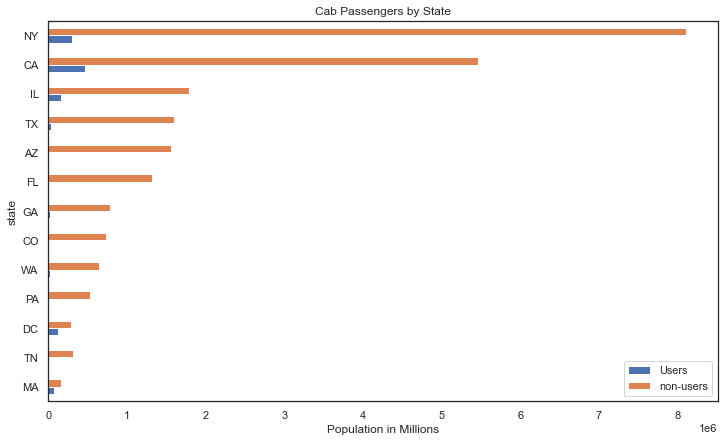

In [83]:
demograph.sort_values(['Population', 'Users'])[['Users', 'non-users']].\
plot(kind = 'barh', stacked = False, figsize = (12, 7), title = "Cab Passengers by State");

plt.xlabel("Population in Millions");

In [85]:
print(dataFrame2['age'].max())
print(dataFrame2['age'].min())

65
18


In [89]:
# Age range that uses cab

dataFrame2.loc[dataFrame2['age']<=18, 'age_group'] = 'teenage'
dataFrame2.loc[dataFrame2['age'].between(19,24), 'age_group'] = 'yadult'
dataFrame2.loc[dataFrame2['age'].between(25,39), 'age_group'] = 'adult'
dataFrame2.loc[dataFrame2['age']>39, 'age_group'] = 'older_adult'

In [90]:
dataFrame2.head()

,transaction_id,travel_date,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,customer_income,state,year,month,dayofweek,day,profit,age_group
0,10128150,2017-01-01,Pink Cab,ATLANTA GA,24.00,379.79,280.800,28154,Card,Male,49,22791,GA,2016,1,6,1,98.990,older_adult
1,10128153,2017-01-01,Pink Cab,ATLANTA GA,38.88,609.62,443.232,29383,Card,Female,57,3602,GA,2016,1,6,1,166.388,older_adult
2,10128188,2017-01-01,Pink Cab,BOSTON MA,41.44,630.76,464.128,59347,Card,Male,26,9408,MA,2016,1,6,1,166.632,adult
3,10128190,2017-01-01,Pink Cab,BOSTON,31.36,463.01,373.184,58311,Card,Female,19,24987,MA,2016,1,6,1,89.826,yadult
4,10128192,2017-01-01,Pink Cab,BOSTON MA,40.46,597.36,457.198,57940,Cash,Female,30,17411,MA,2016,1,6,1,140.162,adult


In [157]:
age_grouping = dataFrame2.groupby([ 'company', 'age_group'])[ 'profit'].sum().reset_index()
age_grouping

,company,age_group,profit
0,Pink Cab,adult,2.511198e+06
1,Pink Cab,older_adult,1.568415e+06
2,Pink Cab,teenage,1.665584e+05
3,Pink Cab,yadult,1.061157e+06
4,Yellow Cab,adult,2.080488e+07
5,Yellow Cab,older_adult,1.317110e+07
6,Yellow Cab,teenage,1.343954e+06
7,Yellow Cab,yadult,8.700441e+06


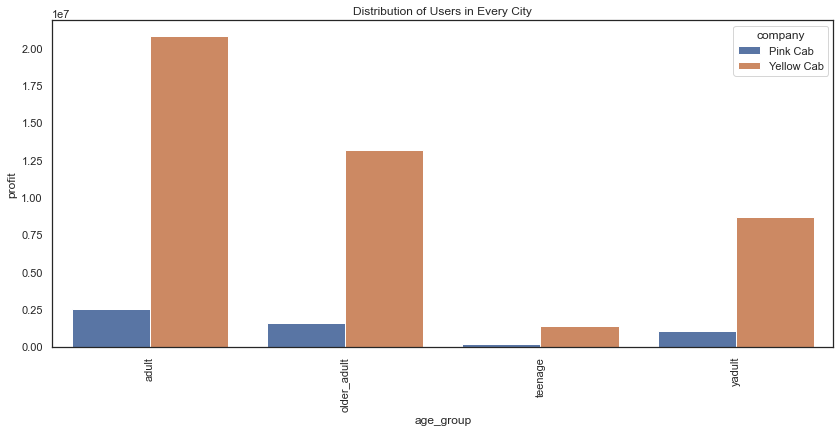

In [160]:
plt.figure(figsize=(14,6))
sns.barplot(x= age_grouping.age_group, y=age_grouping.profit, hue=age_grouping.company)     
plt.title('Age group profit analysis')
plt.xticks(rotation=90)
plt.show()

# Users distribution in cities

In [118]:
city_data

,city,Population,Users,state
0,NEW YORK,8405837,302149,NY
1,CHICAGO,1955130,164468,IL
2,LOS ANGELES,1595037,144132,CA
3,MIAMI,1339155,17675,FL
4,SILICON VALLEY,1177609,27247,CA
5,ORANGE COUNTY,1030185,12994,CA
6,SAN DIEGO,959307,69995,CA
7,PHOENIX,943999,6133,AZ
8,DALLAS,942908,22157,TX
9,ATLANTA,814885,24701,GA


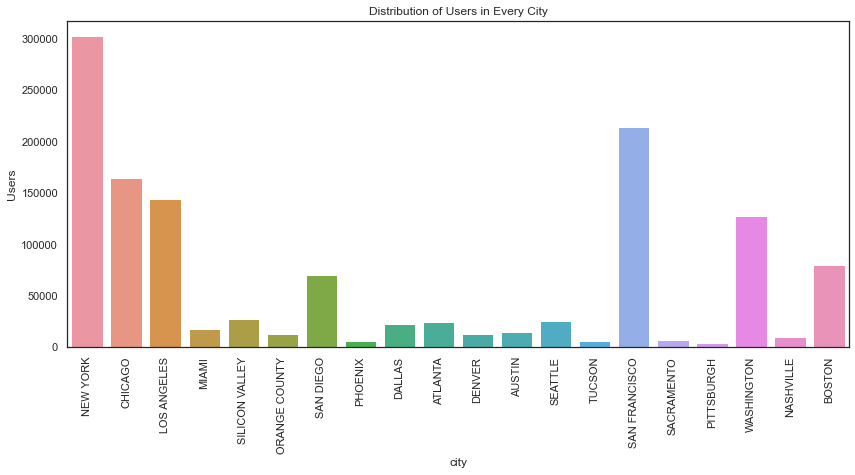

In [121]:
plt.figure(figsize=(14,6))
sns.barplot(x= city_data.city, y=city_data.Users)     
plt.title('Distribution of Users in Every City')
plt.xticks(rotation=90)
plt.show()

In [122]:
dataFrame2.head()

,transaction_id,travel_date,company,city,km_travelled,price_charged,cost_of_trip,customer_id,payment_mode,gender,age,customer_income,state,year,month,dayofweek,day,profit,age_group
0,10128150,2017-01-01,Pink Cab,ATLANTA GA,24.00,379.79,280.800,28154,Card,Male,49,22791,GA,2016,1,6,1,98.990,older_adult
1,10128153,2017-01-01,Pink Cab,ATLANTA GA,38.88,609.62,443.232,29383,Card,Female,57,3602,GA,2016,1,6,1,166.388,older_adult
2,10128188,2017-01-01,Pink Cab,BOSTON MA,41.44,630.76,464.128,59347,Card,Male,26,9408,MA,2016,1,6,1,166.632,adult
3,10128190,2017-01-01,Pink Cab,BOSTON,31.36,463.01,373.184,58311,Card,Female,19,24987,MA,2016,1,6,1,89.826,yadult
4,10128192,2017-01-01,Pink Cab,BOSTON MA,40.46,597.36,457.198,57940,Cash,Female,30,17411,MA,2016,1,6,1,140.162,adult


In [132]:
city_profit = dataFrame2.groupby(['city', 'company'])['profit'].sum().reset_index()
city_profit.head()

,city,company,profit
0,,Pink Cab,3690.6610
1,,Yellow Cab,74431.4984
2,ATLANTA,Pink Cab,1926.6350
3,ATLANTA,Yellow Cab,16127.7684
4,ATLANTA GA,Pink Cab,94123.4410


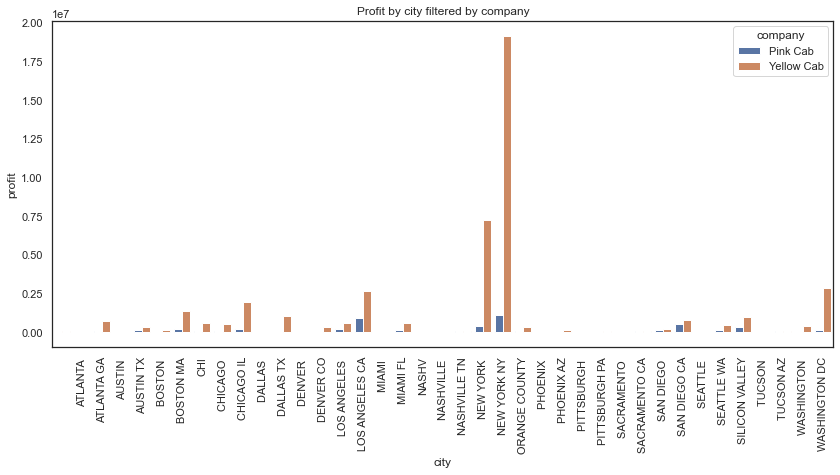

In [140]:
plt.figure(figsize=(14,6))
sns.barplot(x='city', y='profit', data=city_profit, hue='company')     
plt.title('Profit by city filtered by company')
plt.xticks(rotation=90)
plt.show()

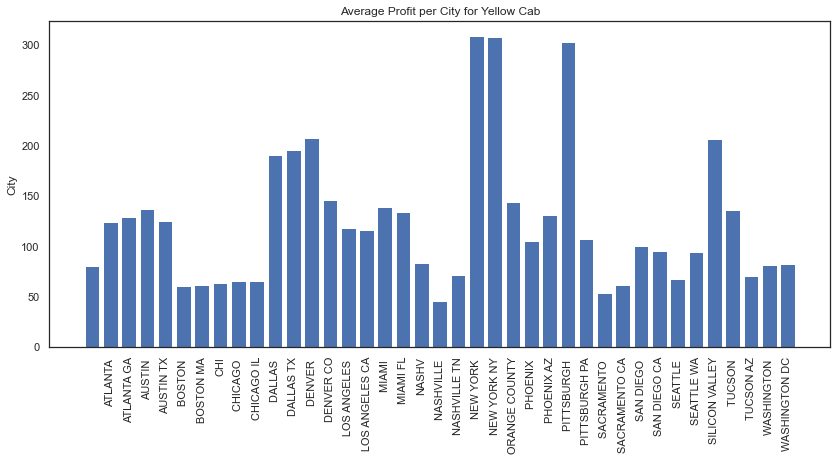

In [155]:
yellow_cab = dataFrame2[dataFrame2.company.isin(['Yellow Cab'])]
pink_cab = dataFrame2[dataFrame2.company.isin(['Pink Cab'])]
counts = yellow_cab.groupby(['city']).profit.mean()
y_new = (yellow_cab.groupby("city").mean())
plt.figure(figsize = (14,6))
plt.bar(y_new.index,y_new["profit"])
plt.xticks(rotation="90")
plt.ylabel("City")
plt.title("Average Profit per City for Yellow Cab")
plt.show()

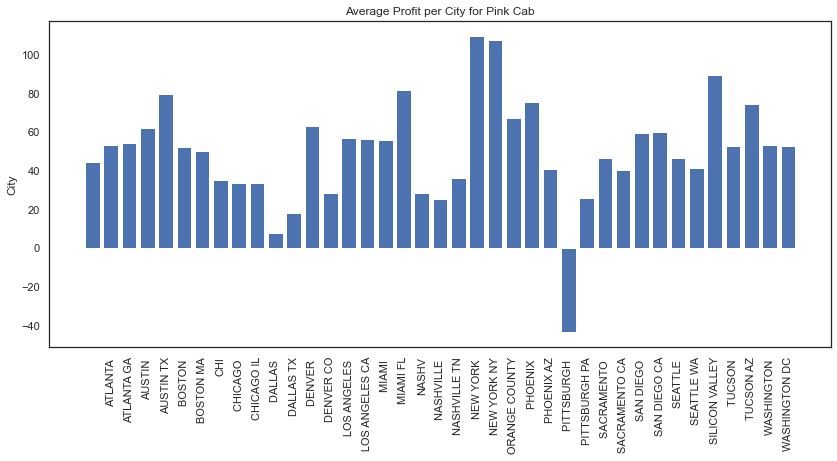

In [156]:
counts = pink_cab.groupby(['city']).profit.mean()
p_new = (pink_cab.groupby("city").mean())
plt.figure(figsize = (14,6))
plt.bar(p_new.index,p_new["profit"])
plt.xticks(rotation="90")
plt.ylabel("City")
plt.title("Average Profit per City for Pink Cab")
plt.show()

# EDA recommendations and result

Pink and Yellow cab have been evaluated based on the following analysis:
1) Yearly profit of each cab company: It can be seen that in the year 2016 the profit if the yellow cab seems to be increasing 
    better than thatof the pink cab. At the year 2017 leading into 2018 there was a bit reduction in the profit of both cabs 
    but the yellow cab is seen to have generated more profit over the stated years.
    
2) Cab passangers by state: This tells us the number of people who use cabs based on the popultion of the city. It is seen 
    from the graph that NY which is NewYork is said to have higher user of cab users than other states and in some other states there is little or no
    useage of cabs.
    
3) Distribution of users by city: This graph gives more details about the distribution of users in cities and it is seen that
    in all the plotted cities, NewYork is seen to have the highest users of cabs.
    
4) Profit by city: Profit by city shows the city that has the highest profit for cabs and this is shown to be New York and it also shows that the Yellow cab
    generated more profit than the pink cab.
    
5) Average profit per yellow cab: This graph shows the average profit of cities based for the Yellow cab and New York still has
the best average proffit. This can be a guide in the decision of the city where one can invest money and also which cab one should invest in.

6) Age group profit analysis: This graph shows which age group is likely to make use of cab frequently and what cab is frequently being used
    it can be seen that adults (25 - 39) are the greatest contribution to the profit of cabs and the most used cab by them is the yellow cab.

Based on the analysis perform would recommend company XYZ to invest in the yellow cab industry based on the above mentioned analysis.
    